# Fashion MNIST Images Classification with CNN Tensorflow

## Enviroment and Dataset Preparation

### Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data Preprocessing

### Image Normalization
Nilai piksel pada gambar berkisar dari 0 hingga 255. Untuk meningkatkan stabilitas dan kecepatan pelatihan, kita perlu menormalisasi nilai-nilai ini ke rentang 0 hingga 1 dengan membaginya dengan 255.

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Reshaping
Model CNN di TensorFlow memerlukan input dengan 4 dimensi: (jumlah_sampel, tinggi, lebar, channel_warna). Karena gambar kita grayscale, channel warnanya adalah 1.

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

## Modeling

### Model Architecture
Merancang arsitektur CNN menggunakan Keras Sequential API. Arsitektur ini terdiri dari beberapa lapisan konvolusi dan pooling, diikuti oleh lapisan fully-connected.

- Conv2D (Lapisan Konvolusi): Lapisan ini akan mengekstrak fitur dari gambar (tepi, sudut, tekstur). Kita menggunakan 32 filter dengan ukuran kernel 3x3 dan fungsi aktivasi ReLU.

- MaxPooling2D (Lapisan Pooling): Mengurangi dimensi spasial (lebar dan tinggi) dari feature map, sehingga mengurangi jumlah parameter dan komputasi.

- Flatten: Mengubah data dari format 2D (matriks) menjadi format 1D (vektor) untuk dihubungkan ke lapisan fully-connected.

- Dense (Lapisan Fully-Connected): Lapisan ini melakukan klasifikasi berdasarkan fitur yang telah diekstrak. Lapisan output memiliki 10 neuron (sesuai jumlah kelas) dengan fungsi aktivasi softmax untuk menghasilkan probabilitas setiap kelas.

In [5]:
model = keras.Sequential([
    # Convolutional first layer
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),

    # Convolutional second layer
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    # Flattens outout dense layer
    keras.layers.Flatten(),

    # Fully-connected dense layer
    keras.layers.Dense(128, activation='relu'),

    # Output layer
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compile Model
Melakukan konfigurasi dengan menentukan optimizer, fungsi loss, dan metrik evaluasi.

- Optimizer: adam adalah optimizer yang efisien dan umum digunakan.

- Loss Function: sparse_categorical_crossentropy cocok untuk masalah klasifikasi multi-kelas di mana labelnya berupa integer.

- Metrics: accuracy digunakan untuk memantau akurasi klasifikasi selama pelatihan.

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### Training Model

In [7]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7818 - loss: 0.6074 - val_accuracy: 0.8721 - val_loss: 0.3498
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8885 - loss: 0.3081 - val_accuracy: 0.8878 - val_loss: 0.3038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9061 - loss: 0.2528 - val_accuracy: 0.8909 - val_loss: 0.2825
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9162 - loss: 0.2207 - val_accuracy: 0.9044 - val_loss: 0.2607
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9277 - loss: 0.1919 - val_accuracy: 0.9005 - val_loss: 0.2691
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9356 - loss: 0.1701 - val_accuracy: 0.9094 - val_loss: 0.2505
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9445 - loss: 0.1482 - val_accuracy: 0.9073 - val_loss: 0.2657
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9499 - loss: 0.131

## Evaluation

### Accuracy

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.4f}')

313/313 - 1s - 3ms/step - accuracy: 0.9104 - loss: 0.3076
Test accuracy: 0.9104


### Visualization

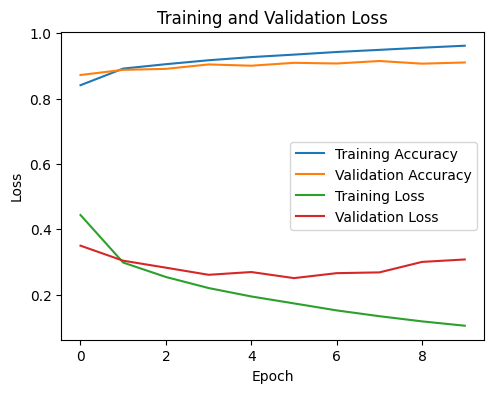

In [9]:
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Testing

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


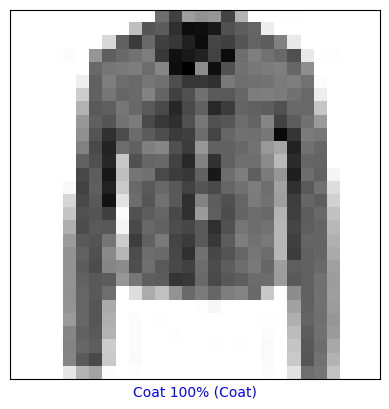

In [10]:
predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

plt.figure()
plot_image(10, predictions[10], test_labels, test_images)
plt.show()

### Test with Custom Image

In [11]:
# from google.colab import files
# from PIL import Image

# uploaded = files.upload()

# for fn in uploaded.keys():
#     # Open the uploaded image
#     img = Image.open(fn).convert('L') # Convert to grayscale

#     # Resize the image to 28x28
#     img = img.resize((28, 28))

#     # Convert the image to a numpy array and normalize
#     img_array = np.array(img) / 255.0

#     # Reshape the image for prediction
#     img_array = img_array.reshape(1, 28, 28, 1)

#     # Make a prediction
#     prediction = model.predict(img_array)

#     # Get the predicted class name
#     predicted_class = class_names[np.argmax(prediction)]

#     # Display the image and prediction
#     plt.imshow(img, cmap=plt.cm.binary)
#     plt.title(f"Prediction: {predicted_class} ({100*np.max(prediction):.2f}%)")
#     plt.axis('off')
#     plt.show()

## Export Model

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# Define the path to save the model in your Google Drive
model_save_path = '/content/drive/MyDrive/PYTHON/Fashion-MNIST-Image-Classification/model/cnn_model.keras'

# Save the model in the SavedModel format
model.save(model_save_path)

print(f"Model saved successfully to {model_save_path}")

Model saved successfully to /content/drive/MyDrive/PYTHON/Fashion-MNIST-Image-Classification/model/cnn_model.keras


In [14]:
!pip install pipreqs
!pipreqs "/content/drive/MyDrive/PYTHON/Fashion-MNIST-Image-Classification/" --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/PYTHON/Fashion-MNIST-Image-Classification/requirements.txt
